<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [2]:
import pandas as pd

<ipython-input-2-7dd3504c366f>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [4]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [5]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [6]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [7]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


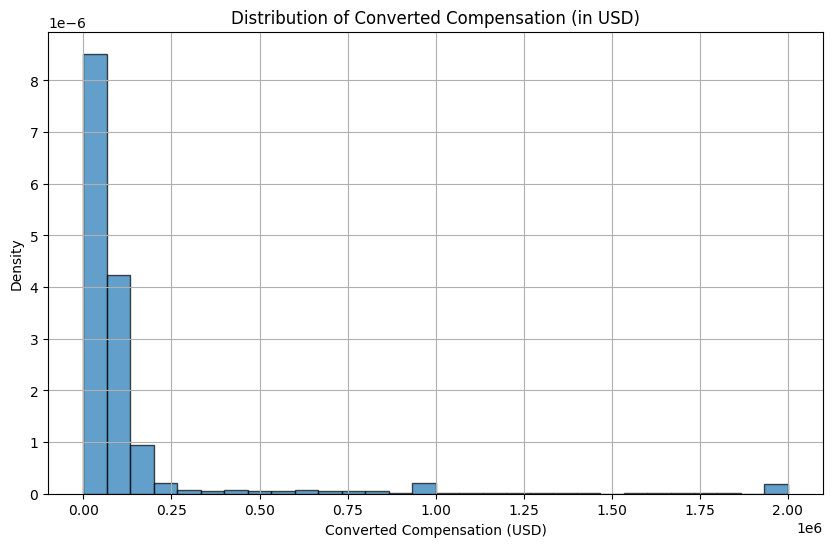

In [10]:
# your code goes here
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'].dropna(), bins=30, edgecolor='k', alpha=0.7, density=True)
plt.title('Distribution of Converted Compensation (in USD)')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

Plot the histogram for the column `ConvertedComp`.


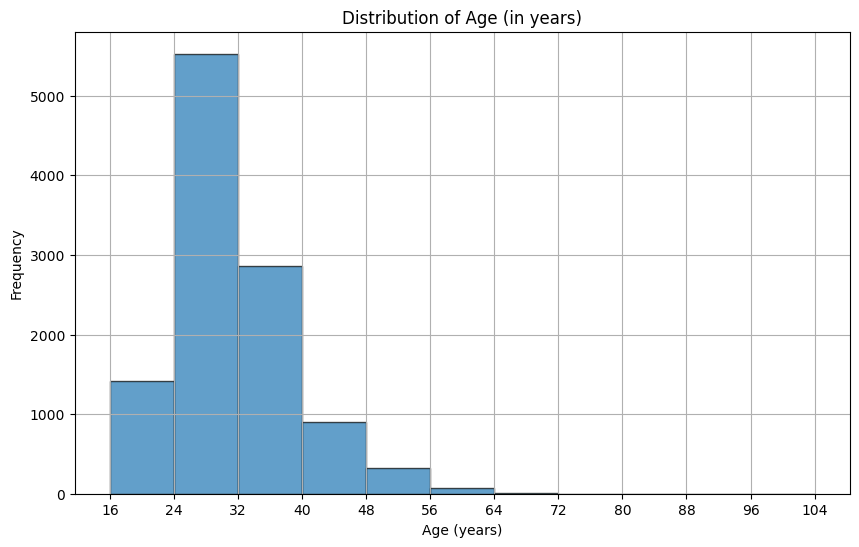

In [12]:
# your code goes here -- i altered the exercise because the exam asked age...
import numpy as np

# Calculate the bin edges with an interval of 8 years
bin_edges = np.arange(df['Age'].min(), df['Age'].max() + 8, 8)

# Plot the histogram with customized bins
plt.figure(figsize=(10, 6))
plt.hist(df['Age'].dropna(), bins=bin_edges, edgecolor='k', alpha=0.7)
plt.title('Distribution of Age (in years)')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')

# Set custom x-axis labels to show the bin edges
plt.xticks(bin_edges)

plt.grid(True)
plt.show()

What is the median of the column `ConvertedComp`?


In [8]:
# your code goes here
median_comp = df['ConvertedComp'].median()
print(f"The median of the Converted Compensation is: {median_comp}")
median_age = df['Age'].median()
print(f"The median of the Age is: {median_age}")

The median of the Converted Compensation is: 57745.0
The median of the Age is: 29.0


How many responders identified themselves only as a **Man**?


In [18]:
# your code goes here
num_men = df['Gender'].value_counts().get('Man', 0)
print(f"The number of respondents who identified as a man is: {num_men}")

The number of respondents who identified as a man is: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [19]:
# your code goes here
median_woman_comp = df[df['Gender'] == 'Woman']['ConvertedComp'].median()
print(f"The median Converted Compensation for respondents identifying only as Woman is: {median_woman_comp}")

The median Converted Compensation for respondents identifying only as Woman is: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [22]:
# your code goes here
five_number_summary = df['Age'].describe()[['min', '25%', '50%', '75%', 'max']]
print("The five-number summary for the column Age are:\n",five_number_summary)

The five-number summary for the column Age are:
 min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


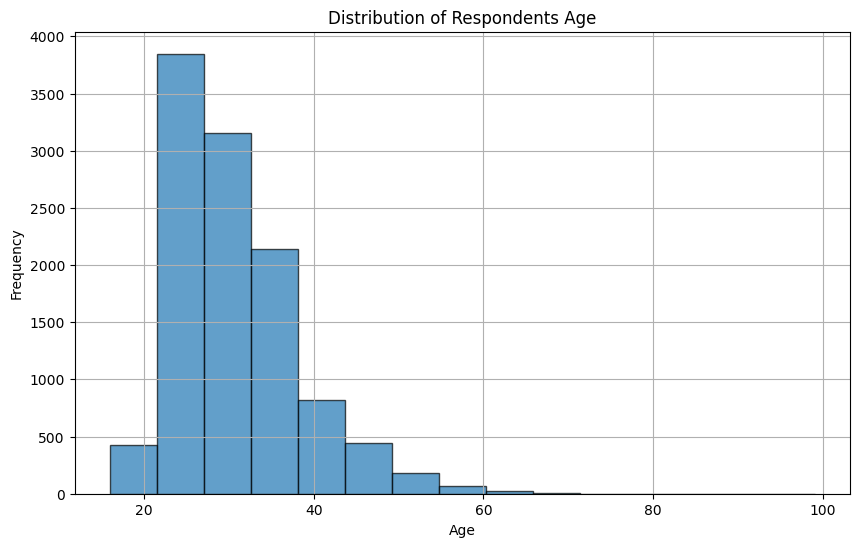

In [23]:
# your code goes here
plt.figure(figsize=(10, 6))
plt.hist(df['Age'].dropna(), bins=15, edgecolor='k', alpha=0.7)
plt.title('Distribution of Respondents Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


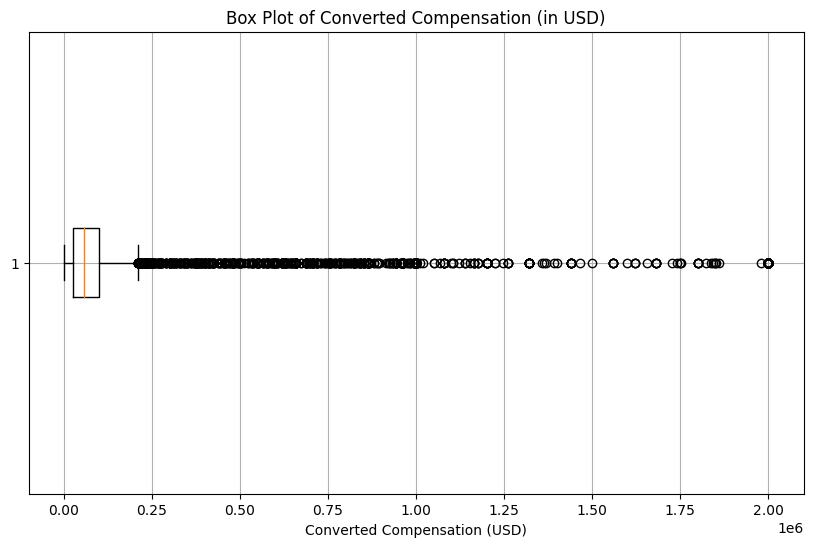

In [24]:
# your code goes here
plt.figure(figsize=(10, 6))
plt.boxplot(df['ConvertedComp'].dropna(), vert=False)
plt.title('Box Plot of Converted Compensation (in USD)')
plt.xlabel('Converted Compensation (USD)')
plt.grid(True)
plt.show()

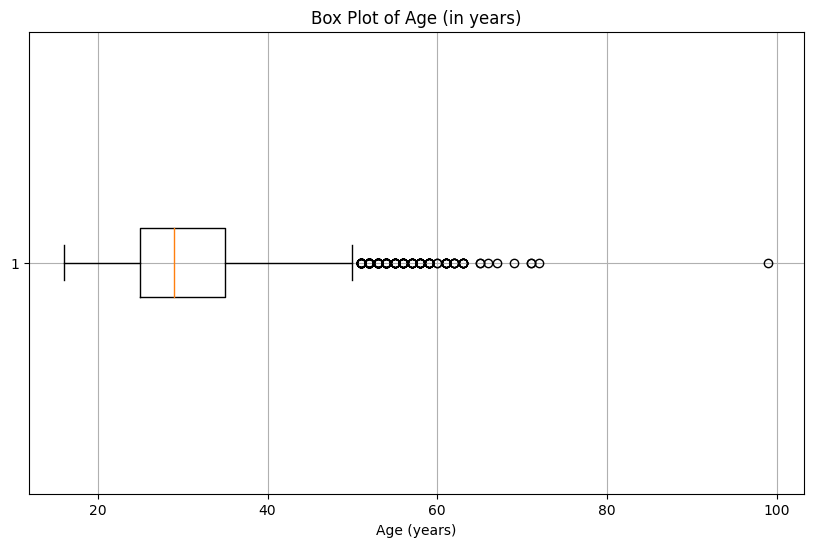

In [21]:
# your code goes here --- Age again to answers the quiz...
plt.figure(figsize=(10, 6))
plt.boxplot(df['Age'].dropna(), vert=False)
plt.title('Box Plot of Age (in years)')
plt.xlabel('Age (years)')
plt.grid(True)
plt.show()

In [22]:
# again for Age column to answer the quiz
# Calculate Q1 (25th percentile) and IQR for the Age column
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower bound (anything below this is considered an outlier)
lower_bound = Q1 - 1.5 * IQR

# Count the number of outliers below Q1 in the Age column
num_outliers_below_q1 = df[df['Age'] < lower_bound].shape[0]
print(f"Number of outliers below Q1 in the Age column: {num_outliers_below_q1}")


Number of outliers below Q1 in the Age column: 0


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [15]:
# your code goes here
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate Interquartile Range (IQR)
IQR = Q3 - Q1
print(f"The Interquartile Range (IQR) for Converted Compensation is: {IQR}")


The Interquartile Range (IQR) for Converted Compensation is: 73132.0


Find out the upper and lower bounds.


In [16]:
# your code goes here
# Calculate the lower and upper bounds using the IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

Lower Bound: -82830.0, Upper Bound: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [17]:
# your code goes here
# Identify the outliers in the 'ConvertedComp' column
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]

# Count the number of outliers
num_outliers = outliers.shape[0]
print(f"The number of outliers in the Converted Compensation column is: {num_outliers}")

The number of outliers in the Converted Compensation column is: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [20]:
# your code goes here
# Create a new DataFrame without outliers
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]
print(f"The new DataFrame has {df_no_outliers.shape[0]} rows after removing outliers.")

median_comp_no_outliers = df_no_outliers['ConvertedComp'].median()
print(f"The median of the Converted Compensation with no outliers is: {median_comp_no_outliers}")

mean_comp_no_outliers = df_no_outliers['ConvertedComp'].mean()
print(f"The mean of the Converted Compensation with no outliers is: {mean_comp_no_outliers}")

The new DataFrame has 9703 rows after removing outliers.
The median of the Converted Compensation with no outliers is: 52704.0
The mean of the Converted Compensation with no outliers is: 59883.20838915799


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [31]:
# your code goes here
# List all numerical columns in the DataFrame
numerical_columns = df.select_dtypes(include=['number']).columns
print("Numerical columns in the DataFrame are:\n", numerical_columns)

# Calculate correlation between 'Age' and all other numerical columns
correlation_matrix = df[['Age', 'CompTotal', 'ConvertedComp', 'WorkWeekHrs', 'CodeRevHrs']].corr()

# Extract correlations of 'Age' with other numerical columns
age_correlation = correlation_matrix['Age'].sort_values(ascending=False)

# Display the correlation values
print("Correlation between Age and other numerical columns:\n", age_correlation)

Numerical columns in the DataFrame are:
 Index(['Respondent', 'CompTotal', 'ConvertedComp', 'WorkWeekHrs', 'CodeRevHrs',
       'Age'],
      dtype='object')
Correlation between Age and other numerical columns:
 Age              1.000000
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CompTotal        0.006970
CodeRevHrs      -0.020469
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
